In [1]:
import mglearn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm
import seaborn as sns

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

# Clustering

> 클러스터링은 비지도 학습방법으로, label(정답)이 존재하지 않는 상태에서 학습을 통해 비슷한 개체끼리 그룹으로 묶는다.  
만약 label이 존재하면서 그룹으로 나눈다면 그것은 지도학습의 분류 모델(Classification Model)이다.

## K-means

- K개의 랜덤한 중심점으로부터 가까운 데이터들을 묶는 군집화 기법
- 평균을 사용함에 따라 이상치에 민감
- 거리를 재기 때문에 스케일링 필수
- 초기 중심에 민감
- K-means++
    - 초기 중심점 선정의 어려움을 해결하기 위한 방법
- 주요 파라미터
    - n_clusters: 군집수
    - init: 기본값이 k-means++

### 알고리즘 작동 방식

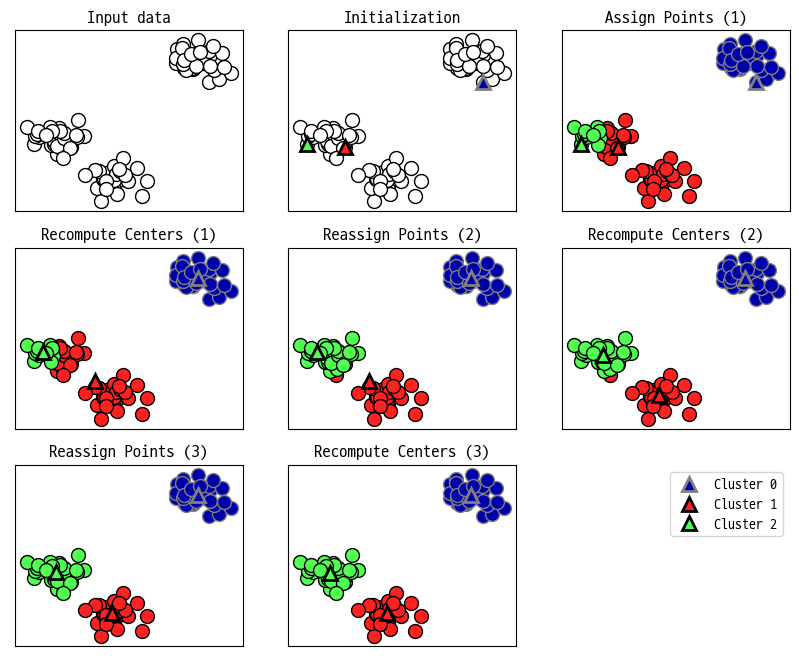

In [3]:
mglearn.plots.plot_kmeans_algorithm()

1. 랜덤으로 중심 초기화(Initialization)
2. 포인트 할당(Assign Points)
> 데이터 포인트를 가장 가까운 클러스터 중심으로 할당
3. 중심 재계산(Recompute Centers)
> 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심 재정의
4. 포인트 변화가 없을 때까지 2, 3 반복

### 모델 학습

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
X.shape, y.shape

((100, 2), (100,))

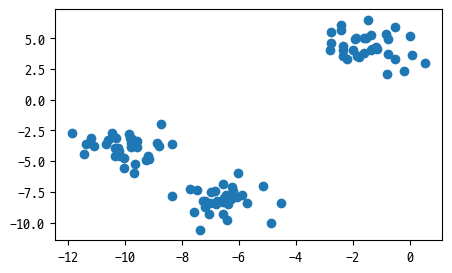

In [5]:
fig = plt.figure(figsize=(5, 3))
plt.scatter(X[:,0], X[:,1])
plt.show(fig)

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [7]:
# 학습한 라벨 확인
kmeans.labels_

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [8]:
# 새 데이터 예측하기
kmeans.predict(X)

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [9]:
y # 실제 라벨 확인

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

### 모델 결과 분석

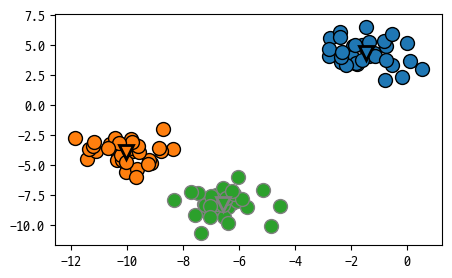

In [10]:
fig = plt.figure(figsize=(5, 3))
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    [0, 1, 2], markers='v', markeredgewidth=2
)
plt.show(fig)

클러스터의 수를 줄이거나 늘릴 수 있다.

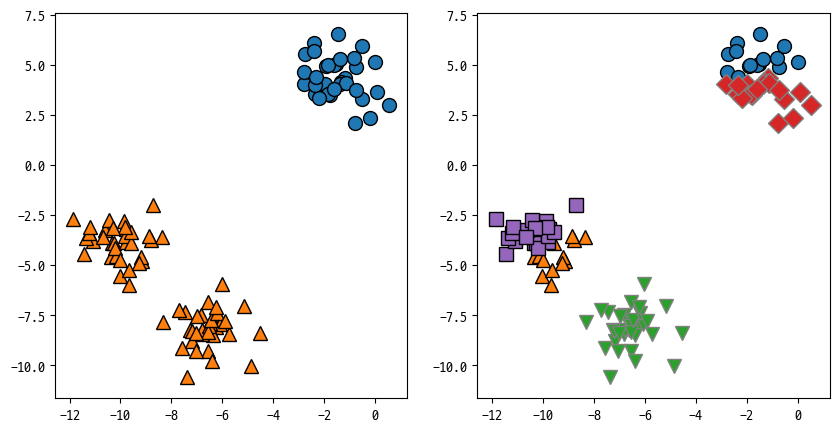

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 클러스터가 2개인 경우
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, ax=axes[0])

# 클러스터가 5개인 경우
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, ax=axes[1])

plt.show(fig, axes)

### k-means가 실패하는 경우

> 각 클러스터를 정의하는 것이 중심 하나뿐이므로, 데이터가 밀집되어 있고, 클러스터를 둥글게 만들 수 있는 모양이어야 효과가 있다.

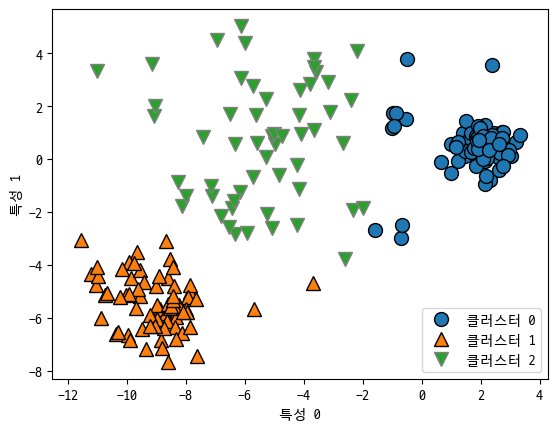

In [12]:
# 밀집되지 않은 데이터
fig = plt.figure()
x_data, y_data = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170) 
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_data)

mglearn.discrete_scatter(x_data[:,0], x_data[:,1], kmeans.labels_)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best') 
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show(fig)

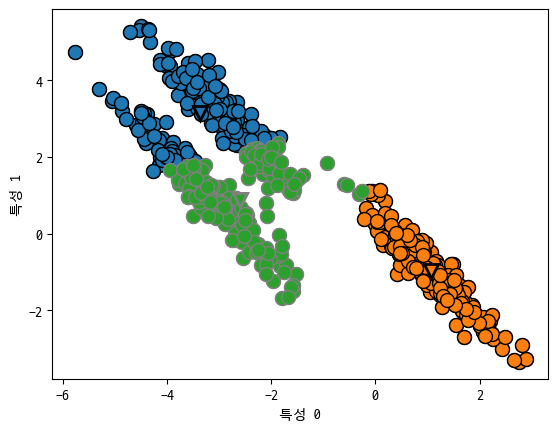

In [14]:
# 둥근 형태가 아닌 데이터

x_data, y_data = make_blobs(random_state=170, n_samples=600) # 무작위 클러스터 데이터 생성

rng = np.random.RandomState(74)
transformation = rng.normal(size=(2,2)) 
x_data = np.dot(x_data, transformation) # 데이터를 길죽하게 변경

kmeans = KMeans(n_clusters=3).fit(x_data) 

mglearn.discrete_scatter(x_data[:,0], x_data[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
    [0,1,2], markers='v', markeredgewidth=2
)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

## 군집 타당성 평가

클러스터링은 정답이 없기 때문에 지도학습에서 사용하는 Accuracy등의 지표로 평가할 수 없다.  
최적의 군집 갯수를 정답 없이 알아내기란 쉽지 않다.

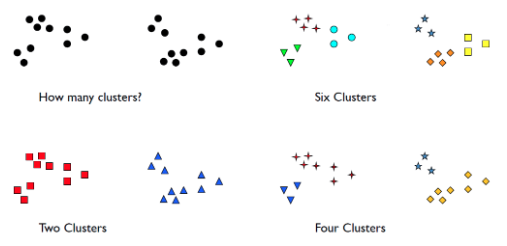

그렇다고 해서 클러스터링을 평가할 수 있는 방법이 아주 없는 것은 아니다. 군집을 만든 결과가 얼마나 유용한지 따지는 군집타당성지표(Clustering Validity Index)가 있기 때문이다. 아래 그림과 같이 (1) 군집 간 거리 (2) 군집의 지름 (3) 군집의 분산 등을 고려한다. 쉽게 말해 아래와 같다.
- 군집 간 분산(inter-cluster variance) 최대화
- 군집 내 분산(inner-cluster variance) 최소화

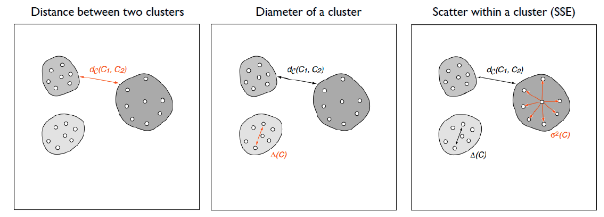

In [15]:
SEED = 42

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()
x = digits.data / 255
y = digits.target
x.shape, y.shape

((1797, 64), (1797,))

In [40]:
np.random.seed(SEED)
idx = np.arange(x.shape[0])
np.random.shuffle(idx)
x = x[idx]
y = y[idx]
x.shape, y.shape

((1797, 64), (1797,))

In [41]:
kmeans = KMeans(n_clusters=10, random_state=SEED)
kmeans.fit(x)

KMeans(n_clusters=10, random_state=42)

### 사전에 정의된 그룹이 있는 경우

- homogeneity
> 각 군집(예측값)이 동일한 클래스(실제값)로 구성되어있는 정도

In [19]:
from sklearn.metrics import homogeneity_score

homogeneity_score(y,kmeans.labels_)

0.737996379571194

- completeness
> 각 클래스(실제값)에 대하여 동일한 군집(예측값)으로 구성되어 있는 정도

In [20]:
from sklearn.metrics import completeness_score

completeness_score(y,kmeans.labels_)

0.74602699054445

- v-measure
> homogeneity와 completeness 조화평균

In [21]:
from sklearn.metrics import v_measure_score

completeness_score(y,kmeans.labels_)

0.74602699054445

### 사전에 정의된 그룹이 없는 경우

- silhouette coefficient(실루엣 계수)
  - <b>군집을 몇 개로 나누어야 할 지도 알 수 없을 경우</b>
  - 밀집된 클러스터에는 좋지만, 모양이 복잡할 때는 평가가 잘 들어맞지 않다.
  - 군집내의 거리는 짧을수록, 군집간의 거리는 길수록 좋은 군집화이다. 이 부분을 평가하기 위한 지표
  - -1 ~ 1 의 값을 가진다.
    - 1에 가까울 수록 명확하게 군집화 됨을 의미
    - 0에 가까울 수록 군집간의 거리가 가까워 진다는 것을 의미
    - 음수일 경우 잘못된 방식으로 군집화 되었다는 의미

In [22]:
from sklearn.metrics import silhouette_score

silhouette_score(x,kmeans.labels_)

0.18226082805532845

## [Overview of Clustering methods](https://scikit-learn.org/stable/modules/clustering.html)

각 알고리즘이 잘 분류하는 데이터 유형

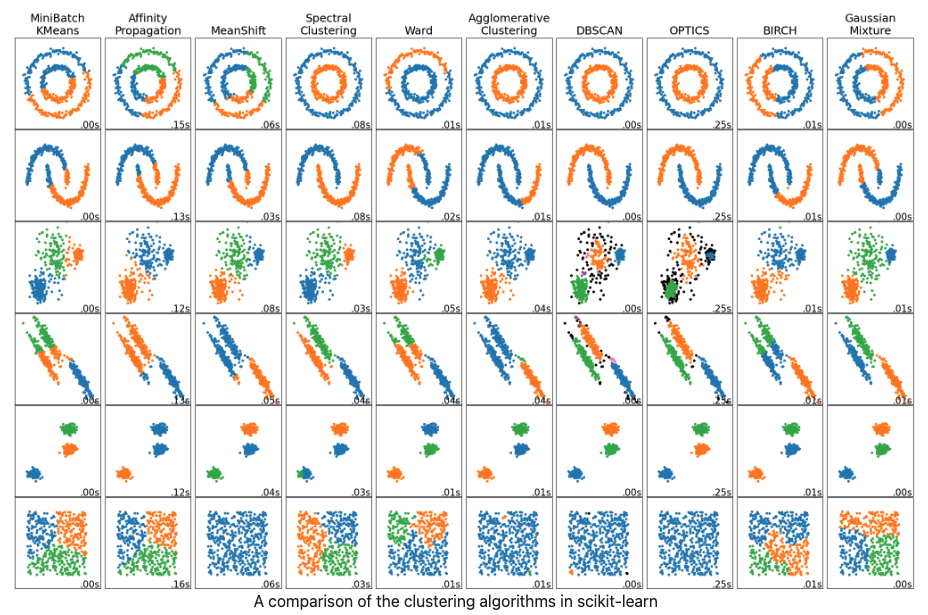

In [23]:
def print_score(x,y,pred):
    print(f"homogeneity: {homogeneity_score(y,pred)}")
    print(f"completeness: {completeness_score(y,pred)}")
    print(f"v_measure: {v_measure_score(y,pred)}")
    print('-'*50)
    print(f"silhouette: {silhouette_score(x,pred)}")

### MiniBatchKMeans
  - mini-batch 개수만큼 무작위로 분리하여 K-means 군집화를 한다.
  - 속도가 훨씬 빠르다.

In [24]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=10,random_state=SEED,batch_size=512 ).fit(x)
print_score(x,y,kmeans.labels_)

homogeneity: 0.7129288903522628
completeness: 0.7288991277425318
v_measure: 0.7208255628252749
--------------------------------------------------
silhouette: 0.18472538252636414


### Agglomerative Clustering(병합 군집)
> 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합치는 알고리즘이다.

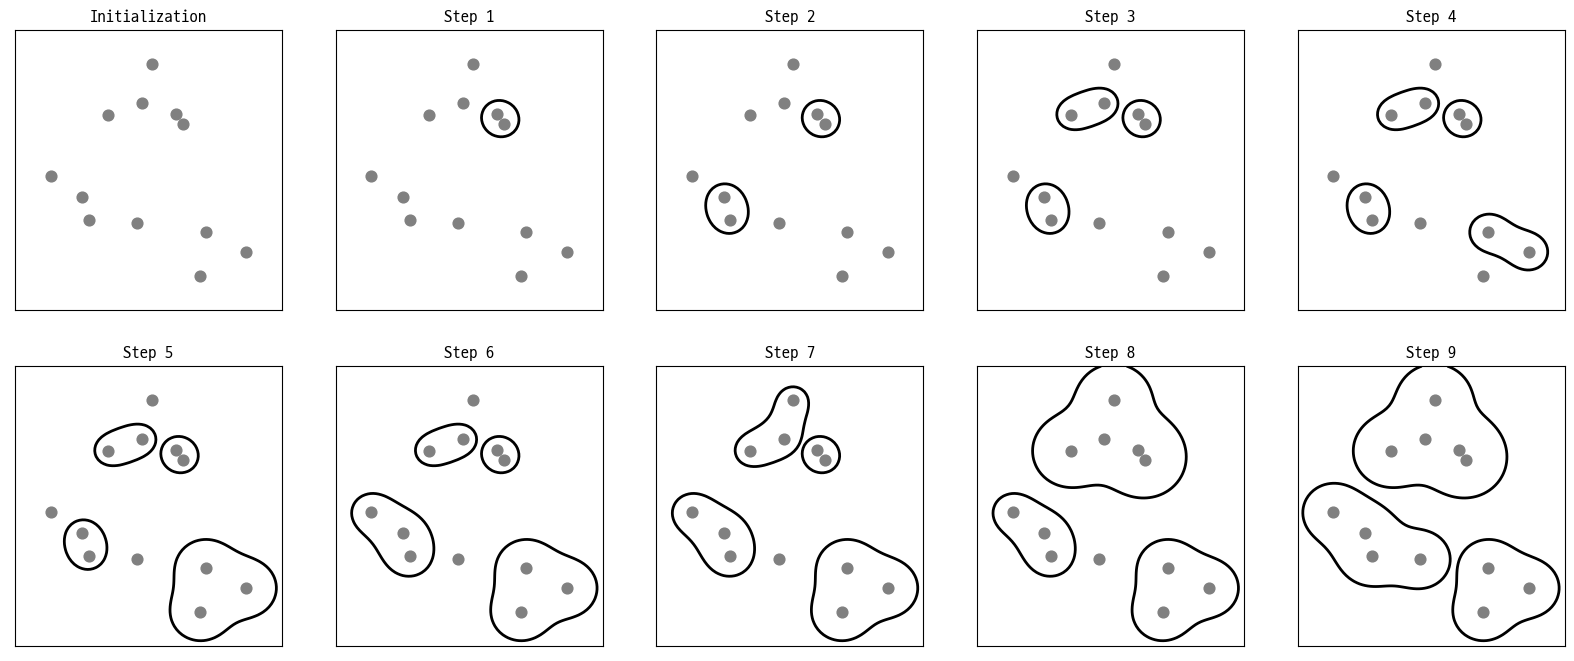

In [29]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10).fit(x)
print_score(x, y, ac.labels_)

homogeneity: 0.8575128719504723
completeness: 0.8790955851724198
v_measure: 0.8681701126909083
--------------------------------------------------
silhouette: 0.17849659940596496


### DBSCAN

- 클러스터의 갯수를 미리 지정할 필요 없음
- 밀도 기반 클러스터링
- 데이터 샘플들이 몰려있는 지점을 찾아 묶어서 군집화
- 주요 파라미터
    - eps: 이웃으로 판단하는 최대 거리
    - min_samples: eps 내에서 군집을 형성할 수 있는 최소 샘플 수

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


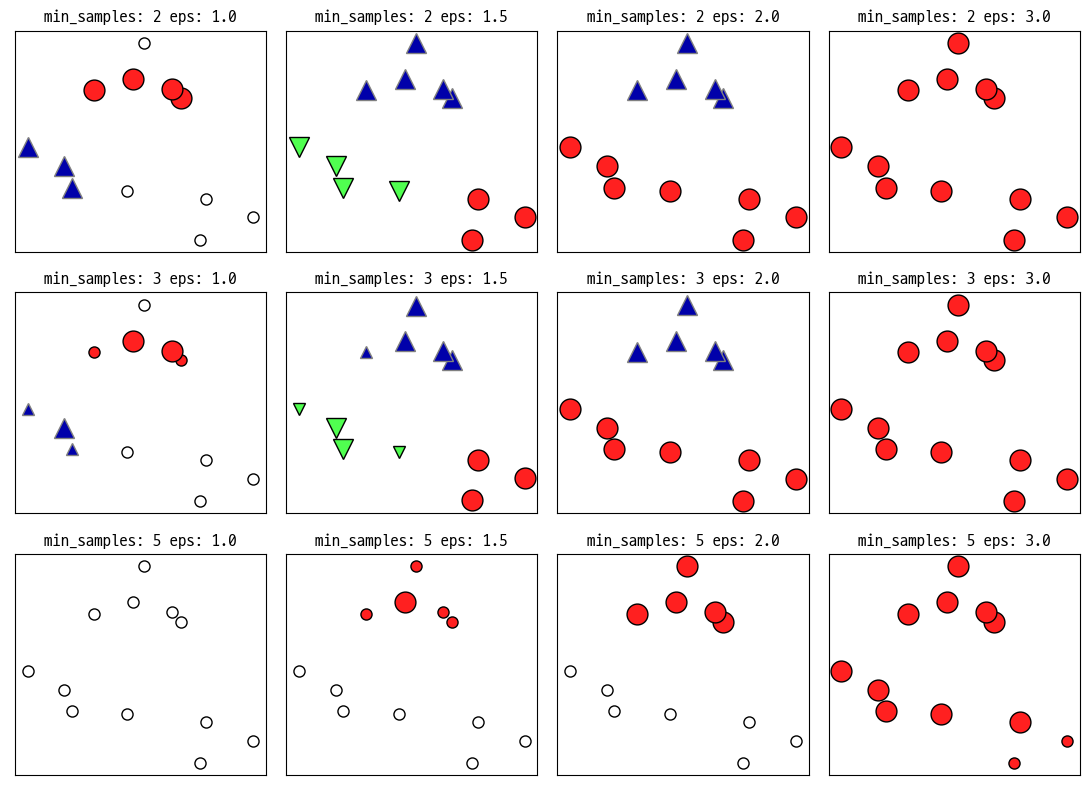

In [33]:
mglearn.plots.plot_dbscan()
plt.show()

클러스터에 속한 포인트는 색을 칠하고, Noise 포인트는 흰색으로 표시함.
핵심 포인트는 크게 표시, 경계 포인트는 작게 표시함.
- eps를 증가시키면 클러스터를 커지게 하여 여러 클러스터를 합치는 효과를 준다.
- min_samples를 증가시키면 핵심 포인트 수가 줄어들며, Noise 포인트가 늘어난다.

In [47]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=3, eps=0.05, n_jobs=1).fit(x)
print_score(x, y, dbscan.labels_)

homogeneity: 0.07120590002352155
completeness: 0.35826557533497766
v_measure: 0.11880007964616032
--------------------------------------------------
silhouette: -0.29235730958906886
